In [2]:
import phoenix as px
client = px.Client()
df = client.get_spans_dataframe(start_time="2024-04-04T00:00:00Z", end_time="2024-04-04T00:00:00Z", project_name="default")
df.describe()


/Users/zacw/CODE/surf-build/aiq-profiler-agent/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/zacw/CODE/surf-build/aiq-profiler-agent/.venv/lib/python3.12/site-packages/phoenix/utilities/client.py:60: UserWarning: The Phoenix server (8.20.0) and client (8.22.1) versions are mismatched and may have compatibility issues.
  warnings.warn(


,attributes.llm.token_count.prompt,attributes.llm.token_count.total,attributes.llm.token_count.completion
count,67.000000,67.000000,67.000000
mean,309.343284,338.626866,29.283582
std,196.057857,205.407934,26.905449
min,0.000000,0.000000,0.000000
25%,129.000000,173.000000,14.000000
50%,331.000000,359.000000,17.000000
75%,485.000000,505.000000,57.000000
max,534.000000,584.000000,122.000000


In [3]:
df_one = df[df['context.trace_id'] == 'fd886bdf1ab29a7a306d0bfe84ccaf50']


In [4]:
import pandas as pd
import json
from matplotlib.patches import Patch

def extract_user_query(input_value):
    if pd.isna(input_value):
        return None
    try:
        # Try to parse as JSON
        data = json.loads(input_value.replace('""', '"'))
        if isinstance(data, list):
            for item in data:
                if isinstance(item, dict) and item.get("type") == "human":
                    content = item.get("content", "")
                    # Extract the actual query which is often at the end
                    query_marker = "Here is the user's query: "
                    if query_marker in content:
                        return content.split(query_marker)[-1].strip()
            return None
        elif isinstance(data, dict) and "input_message" in data:
            return data.get("input_message")
    except:
        return input_value
    return None
df_one['query'] = df_one['attributes.input.value'].apply(extract_user_query)
df_one['query']


/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/4107582397.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['query'] = df_one['attributes.input.value'].apply(extract_user_query)


context.span_id
5c68e0898df3dcb5                                               hello?
4c12528cfe757b27                                               hello?
00457833123c01f2                                                 None
6f73b38a818677a5    hello?\nCurrent timestamp: 2025-04-01T15:09:14...
60d034ce029f23e6                                                 None
790f8725d37b4027                                               hello?
Name: query, dtype: object

In [5]:
df_one['start_time'] = pd.to_datetime(df_one['start_time'])
df_one['end_time'] = pd.to_datetime(df_one['end_time'])

# Calculate duration in seconds
df_one['duration'] = (df_one['end_time'] - df_one['start_time']).dt.total_seconds()
len(df_one)

/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/3358780717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['start_time'] = pd.to_datetime(df_one['start_time'])
/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/3358780717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['end_time'] = pd.to_datetime(df_one['end_time'])
/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/3358780717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

6

In [6]:
df_two = df[df['context.trace_id'] == 'a94c520a86a3cfc9a9f6aad70b2171b6']
df_two['query'] = df_two['attributes.input.value'].apply(extract_user_query)
df_two['query']

/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/670161207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two['query'] = df_two['attributes.input.value'].apply(extract_user_query)


context.span_id
a1689290e5833b71    How many pallets were in storage zone 1 from 5...
43bf747e9501dcee                                                 None
f01c27e5ab19d766    How many pallets were in storage zone 1 from 5...
8a600c087c3620dc                                                 None
e811e736fa441b71                                                 None
1a132013944e0cad                                                 None
53002c74775ef510                                                 None
754f01b3228efa1a                                                 None
67f453350302043a    How many pallets were in storage zone 1 from 5...
239f50fb9fea4074                                                 None
9b1de5a04a7a4cbf                                                 None
Name: query, dtype: object

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

def create_trace_flow_diagram(df):
    """
    Create a simple flow diagram visualization that doesn't require graphviz.
    Each span is plotted separately regardless of name.
    """
    # Sort by start_time
    df = df.sort_values('start_time')
    
    # Calculate seconds from start
    min_time = df['start_time'].min()
    df['start_seconds'] = (df['start_time'] - min_time).dt.total_seconds()
    df['end_seconds'] = (df['end_time'] - min_time).dt.total_seconds()
    df['duration'] = df['end_seconds'] - df['start_seconds']
    # Filter out spans with very short durations (less than 0.02 seconds)
    
    df = df[(df['duration'] >= 0.02) & (df['span_kind'] != 'UNKNOWN')]
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Define colors for different span kinds
    colors = {'LLM': 'skyblue', 'CHAIN': 'lightgreen', 'TOOL': 'orange'}
    
    # Create a vertical timeline with connections
    y_positions = {}
    max_x = 0
    user_query = df['attributes.input.value'].apply(extract_user_query).dropna().iloc[0]
    
    # First pass: determine y positions for each span
    for i, (_, row) in enumerate(df.iterrows()):
        span_id = row['context.span_id']
        y_positions[span_id] = i
    
    # Second pass: draw boxes and connections
    for i, (_, row) in enumerate(df.iterrows()):
        span_id = row['context.span_id']
        span_kind = row['span_kind']
        name = row['name']
        x_start = row['start_seconds']
        x_end = row['end_seconds']
        max_x = max(max_x, x_end)
        
        # Draw span box
        color = colors.get(span_kind, 'lightgray')
        rect = plt.Rectangle((x_start, 0.5*i-0.2), x_end-x_start, 0.4, 
                           color=color, alpha=0.8, edgecolor='black')
  
        ax.add_patch(rect)
        
        # Add label
        duration_text = f"{row['duration']:.2f}s"
        if i == 0:
            txt = f"{name}: {user_query}\n{row['start_time'].strftime('%Y-%m-%d %H:%M:%S')}\n{duration_text}"
        else:
            txt = f"{name}\n{duration_text}"
        ax.text(x_start + (x_end-x_start)/2, 0.5*i-0.05, 
                txt,
                ha='center', va='center', fontsize=8)
        
    
    # Set y-axis ticks (no labels to avoid clutter)
    ax.set_yticks([])
    
    # Set x-axis limits and labels
    ax.set_xlim(-1, max_x + 1)
    ax.set_ylim(-1, len(df))
    ax.set_xlabel('Time (seconds from start)')
    
    # Add grid for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Add title
    ax.set_title('Trace Flow Diagram')
    


    # Create legend handles (these won't be drawn on the plot)
    legend_handles = [Patch(color=color, label=kind) for kind, color in colors.items()]

    # Add the legend using handles
    ax.legend(handles=legend_handles, loc='upper right')
    
    plt.tight_layout()
    return fig

def visualize_component_durations(df):
    """
    Create a bar chart to show the duration of each component.
    Each span is shown separately regardless of name.
    """
    # Sort by duration (descending)
    df_sorted = df = df.sort_values(['start_time', 'end_time'], ascending=[True, False])
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Define colors for different span kinds
    colors = {'LLM': 'skyblue', 'CHAIN': 'lightgreen', 'UNKNOWN': 'lightgray', 'TOOL': 'orange'}
    
    # Get color list based on span_kind
    bar_colors = [colors.get(kind, 'lightgray') for kind in df_sorted['span_kind']]
    
    # Create the bar chart
    bars = ax.bar(range(len(df_sorted)), df_sorted['duration'], color=bar_colors)
    
    # Add bar labels
    for i, bar in enumerate(bars):
        row = df_sorted.iloc[i]
        height = bar.get_height()
        ax.text(i, height + 0.1, 
                f"{row['name']}\n{row['context.span_id'][:6]}...\n{height:.2f}s", 
                ha='center', va='bottom', rotation=45, fontsize=8)
    
    # Add labels and title
    ax.set_ylabel('Duration (seconds)')
    ax.set_title('Component Durations')
    ax.set_xticks([])
    
    # Add a legend
    # Create legend handles (these won't be drawn on the plot)
    legend_handles = [Patch(color=color, label=kind) for kind, color in colors.items()]

    # Add the legend using handles
    ax.legend(handles=legend_handles, loc='upper right')
    
    # Add grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    return fig


def create_trace_summary(df):
    """
    Create a summary of the trace data.
    """
    # Calculate basic statistics
    total_spans = len(df)
    unique_span_kinds = df['span_kind'].unique()
    total_duration = (df['end_time'].max() - df['start_time'].min()).total_seconds()
    
    # Count by span_kind
    span_kind_counts = df['span_kind'].value_counts().to_dict()
    
    # Count unique names per span_kind
    unique_names_per_kind = df.groupby('span_kind')['name'].unique().to_dict()
    
    # Get user query and final response
    chain_spans = df[df['span_kind'] == 'CHAIN']
    user_query = None
    if not chain_spans.empty and not pd.isna(chain_spans.iloc[0]['user_query']):
        user_query = chain_spans.iloc[0]['user_query']
    
    llm_spans = df[df['span_kind'] == 'LLM']
    final_response = None
    if not llm_spans.empty and not pd.isna(llm_spans.iloc[-1]['output_value']):
        final_response = llm_spans.iloc[-1]['output_value']
    
    # Calculate average response times per span type
    avg_durations = df.groupby('span_kind')['duration'].mean().to_dict()
    
    # Identify the slowest span
    slowest_span_idx = df['duration'].idxmax()
    slowest_span = df.loc[slowest_span_idx]
    
    summary = {
        'Total Spans': total_spans,
        'Span Types': list(unique_span_kinds),
        'Span Counts by Type': span_kind_counts,
        'Unique Names by Type': unique_names_per_kind,
        'Total Duration (seconds)': total_duration,
        'Average Duration by Type (seconds)': avg_durations,
        'Slowest Span': {
            'Name': slowest_span['name'],
            'ID': slowest_span['context.span_id'],
            'Kind': slowest_span['span_kind'],
            'Duration': slowest_span['duration']
        },
        'User Query': user_query,
        'Final Response': final_response
    }
    
    return summary



/var/folders/5s/0dpn0v6s3bx031947gf29yqw0000gp/T/ipykernel_91044/557296778.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x_start, 0.5*i-0.2), x_end-x_start, 0.4,


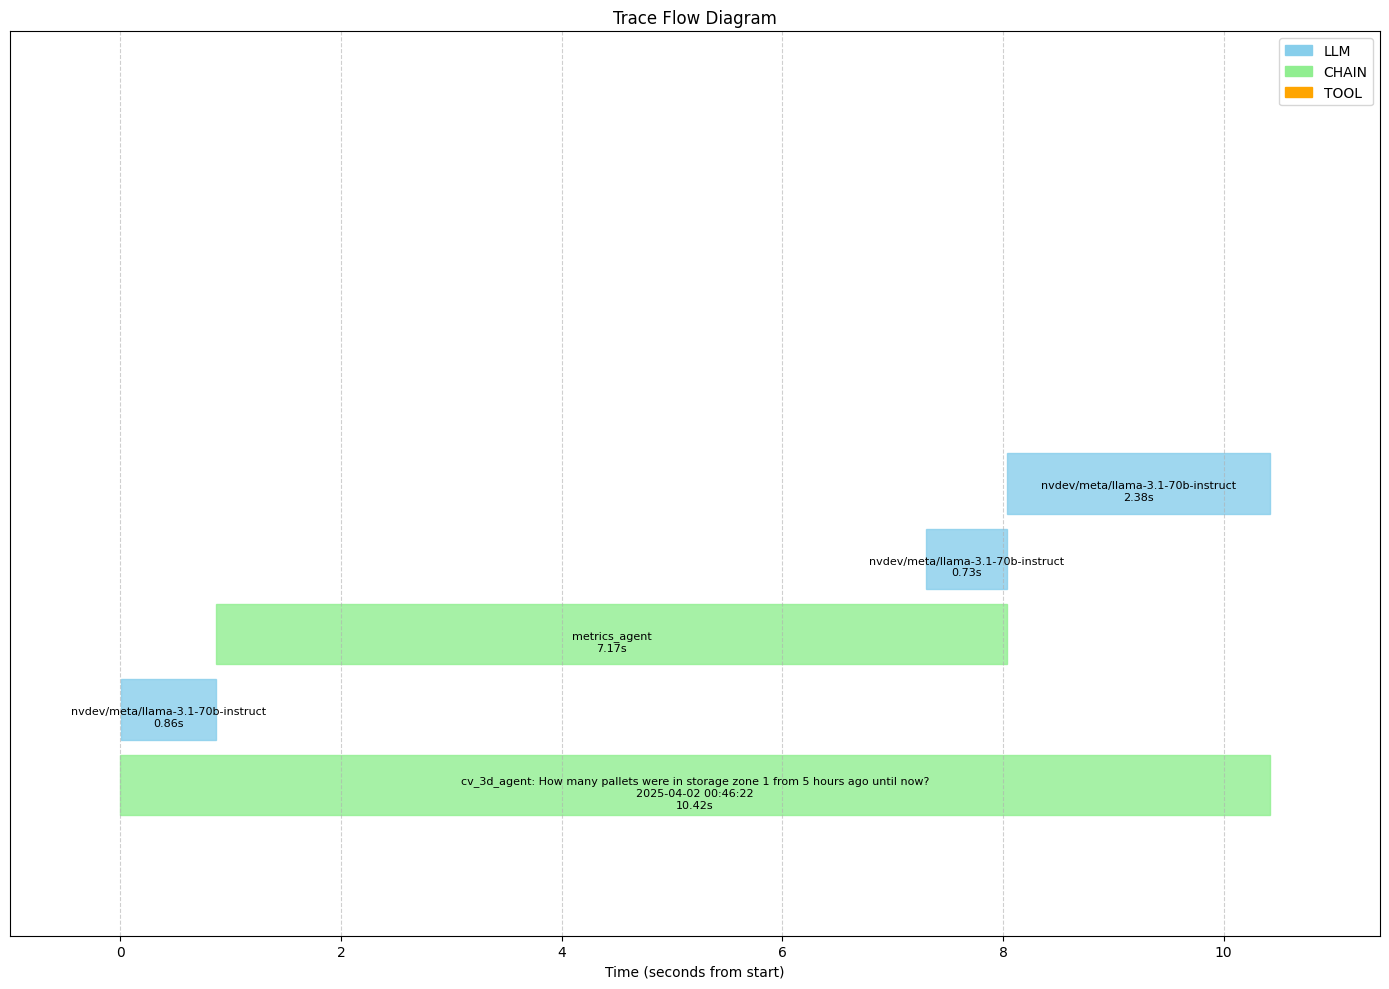

In [8]:
fig = create_trace_flow_diagram(df_two)
# show this figure in notebook
plt.show()
fig.savefig("trace_timeline.png")

In [9]:
from pydantic import BaseModel, Field
class PxQueryInput(BaseModel):
    """Input parameters model for Phoenix server queries."""

    # not used for now, we will filter the dataframe
    # filter_conditions: list[str] | None = Field(
    #     None,
    #     description="The filter conditions to apply to the dataframe.",
    # )
    start_time: str | None = Field(
        None,
        description="The start time to apply to the dataframe for filtering. for last n queries, use last 24 hours",
    )
    end_time: str | None = Field(
        None,
        description="The end time to apply to the dataframe for filtering. for last n queries, use the current time",
    )
    project_name: str = Field(
        "default",
        description="The project name to apply to the dataframe.",
    )

from langchain_core.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=PxQueryInput)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"description": "Input parameters model for Phoenix server queries.", "properties": {"start_time": {"anyOf": [{"type": "string"}, {"type": "null"}], "default": null, "description": "The start time to apply to the dataframe for filtering. for last n queries, use last 24 hours", "title": "Start Time"}, "end_time": {"anyOf": [{"type": "string"}, {"type": "null"}], "default": null, "description": "The end time to apply to the dataframe for filtering. for last n queries, use the current time", "title": "End Time"}, "project_name": {"default

In [10]:
print(df_two.index)
print(df_two.columns)


Index(['a1689290e5833b71', '43bf747e9501dcee', 'f01c27e5ab19d766',
       '8a600c087c3620dc', 'e811e736fa441b71', '1a132013944e0cad',
       '53002c74775ef510', '754f01b3228efa1a', '67f453350302043a',
       '239f50fb9fea4074', '9b1de5a04a7a4cbf'],
      dtype='object', name='context.span_id')
Index(['name', 'span_kind', 'parent_id', 'start_time', 'end_time',
       'status_code', 'status_message', 'events', 'context.span_id',
       'context.trace_id', 'attributes.aiq', 'attributes.input.mime_type',
       'attributes.llm.token_count.prompt', 'attributes.llm.token_count.total',
       'attributes.input.value', 'attributes.llm.token_count.completion',
       'attributes.openinference.span.kind', 'attributes.output.value',
       'query'],
      dtype='object')


In [11]:
df.groupby("context.trace_id")["start_time"].min

<bound method GroupBy.min of <pandas.core.groupby.generic.SeriesGroupBy object at 0x15b257140>>

In [12]:
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from langchain_core.messages import AIMessage
from pydantic import BaseModel
import base64
from typing import Any
class WeatherOutput(BaseModel):
    weather: str
    degrees: int
    img: str

class Location(BaseModel):
    location: str


@tool
def get_weather(location: Location) -> WeatherOutput:
    """Call to get the current weather."""
    location = location.location
    import io
    buffer = io.BytesIO()
    fig.savefig(buffer, format='jpeg', dpi=360)
    buffer.seek(0)
    img_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    if location.lower() in ["sf", "san francisco"]:
        return WeatherOutput(weather="It's 60 degrees and foggy.", degrees=60, img=img_base64)
    else:
        return WeatherOutput(weather="It's 90 degrees and sunny.", degrees=90, img=img_base64)
@tool
def get_coolest_cities():
    """Get a list of coolest cities"""
    return "nyc, sf"

tool_node = ToolNode(tools=[get_weather, get_coolest_cities])
message_with_single_tool_call = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "get_weather",
            "args": {"location": {"location": "sf"}},
            "id": "tool_call_id",
            "type": "tool_call",
        }
    ],
)

class ToolCallbackHandler:
    def on_tool_end(self, output: Any, **kwargs: Any) -> None:
        print(output)

response = tool_node.invoke({"messages": [message_with_single_tool_call]},{ "callbacks":[ToolCallbackHandler()], "configurable":{} })
print(response)

Error in ToolCallbackHandler.on_tool_start callback: AttributeError("'ToolCallbackHandler' object has no attribute 'ignore_agent'")


{'messages': [ToolMessage(content='Error: AttributeError("\'ToolCallbackHandler\' object has no attribute \'raise_error\'")\n Please fix your mistakes.', name='get_weather', tool_call_id='tool_call_id', status='error')]}


In [13]:
for x, y in df.groupby('span_kind'):
    print(x, type(y))

CHAIN <class 'pandas.core.frame.DataFrame'>
LLM <class 'pandas.core.frame.DataFrame'>
TOOL <class 'pandas.core.frame.DataFrame'>
UNKNOWN <class 'pandas.core.frame.DataFrame'>


In [28]:
def first_valid_query(series):
    # Apply extract_user_query to each value
    extracted_values = series.apply(extract_user_query)
    
    # Return the first non-None result
    non_none_results = extracted_values.dropna()
    if not non_none_results.empty:
        return non_none_results.iloc[0]
    
    return None

# Apply to each group
mapped =  df.groupby(df["context.trace_id"])['attributes.input.value'].apply(first_valid_query)
df["user_query"] = df["context.trace_id"].map(mapped)
df["user_query"]


context.span_id
5c68e0898df3dcb5                                               hello?
4c12528cfe757b27                                               hello?
00457833123c01f2                                               hello?
6f73b38a818677a5                                               hello?
60d034ce029f23e6                                               hello?
                                          ...                        
53002c74775ef510    How many pallets were in storage zone 1 from 5...
754f01b3228efa1a    How many pallets were in storage zone 1 from 5...
67f453350302043a    How many pallets were in storage zone 1 from 5...
239f50fb9fea4074    How many pallets were in storage zone 1 from 5...
9b1de5a04a7a4cbf    How many pallets were in storage zone 1 from 5...
Name: user_query, Length: 190, dtype: object